In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
import os
download_folder = 'C:\\Users\\NGOZI OKEKE\\Downloads'
file_name = '2022_forbes_billionaires.csv'
file_path = os.path.join(download_folder, file_name)

In [3]:
Forbes_df=pd.read_csv(file_path,index_col=0)

In [4]:
try:
    Forbes_df=pd.read_csv(file_path,index_col=0)
    #Forbes_df Dataframe available to work with
except:
    print("File {file_path} not found")

In [5]:
Forbes_df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [6]:
Forbes_df.tail()

,rank,name,networth,age,country,source,industry
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [9]:
Forbes_df.iloc[129]

rank                   130
name        Aliko Dangote 
networth             $14 B
age                     64
country            Nigeria
source       cement, sugar
industry    Manufacturing 
Name: 129, dtype: object

In [10]:
Forbes_df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [11]:
Forbes_df['networth']=Forbes_df['networth'].apply(lambda x:x.replace('$','')).apply(lambda x:x.replace('B','')).apply(lambda x:x.replace(' ','')).astype(np.float64)

In [12]:
Forbes_df=Forbes_df.rename(columns={'rank':'Rank','networth':'Networth($ Billion)','name':'Name','age':'Age','country':'Country','source':'Source','industry':'Industry'})

In [13]:
Forbes_df.isnull().sum()

Rank                   0
Name                   0
Networth($ Billion)    0
Age                    0
Country                0
Source                 0
Industry               0
dtype: int64

First Analysis: Top 10 Billionaires on the Forbes list _ Chart visualization

C:\Users\NGOZI OKEKE\AppData\Local\Temp\ipykernel_7220\354282257.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=Forbes_df['Name'][:11], rotation=90)


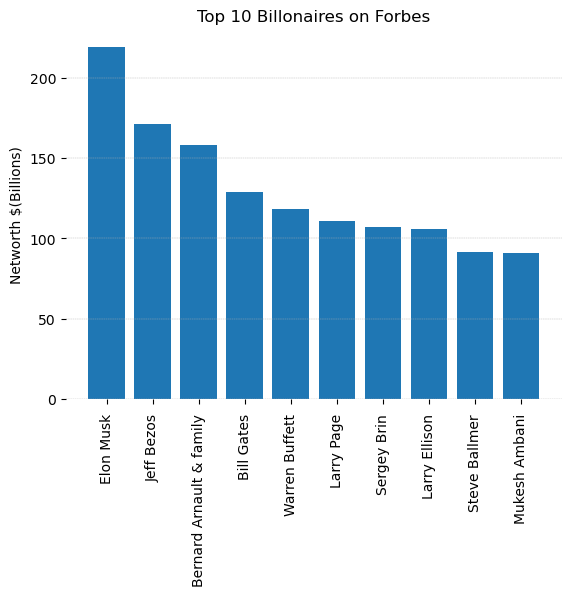

In [14]:
fig,ax=plt.subplots()
ax.bar(Forbes_df['Name'][:10],Forbes_df['Networth($ Billion)'][:10])
[s.set_visible(False) for s in ax.spines.values()]
ax.set_title('Top 10 Billonaires on Forbes')
ax.set_ylabel('Networth $(Billions)')
ax.set_xticklabels(labels=Forbes_df['Name'][:11], rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [16]:
Forbes_df['Country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [17]:
len(Forbes_df['Country'].unique())

75

In [18]:
Forbes_df.groupby('Country').size()

Country
Algeria            1
Argentina          6
Australia         44
Austria           11
Barbados           1
                ... 
United States    719
Uruguay            2
Venezuela          1
Vietnam            7
Zimbabwe           1
Length: 75, dtype: int64

In [19]:
Country_counts=Forbes_df.groupby('Country').size()

In [20]:
Country_counts=Country_counts.to_frame()

In [21]:
Country_counts=Country_counts.rename(columns={0:'Count'})

In [22]:
Country_counts=Country_counts.sort_values(by='Count',ascending=False)

In [24]:
Country_counts

,Count
Country,
United States,719
China,515
India,161
Germany,130
Russia,81
...,...
Eswatini (Swaziland),1
Estonia,1
Belize,1


C:\Users\NGOZI OKEKE\AppData\Local\Temp\ipykernel_7220\3643321487.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=Country_counts.index, rotation=90)


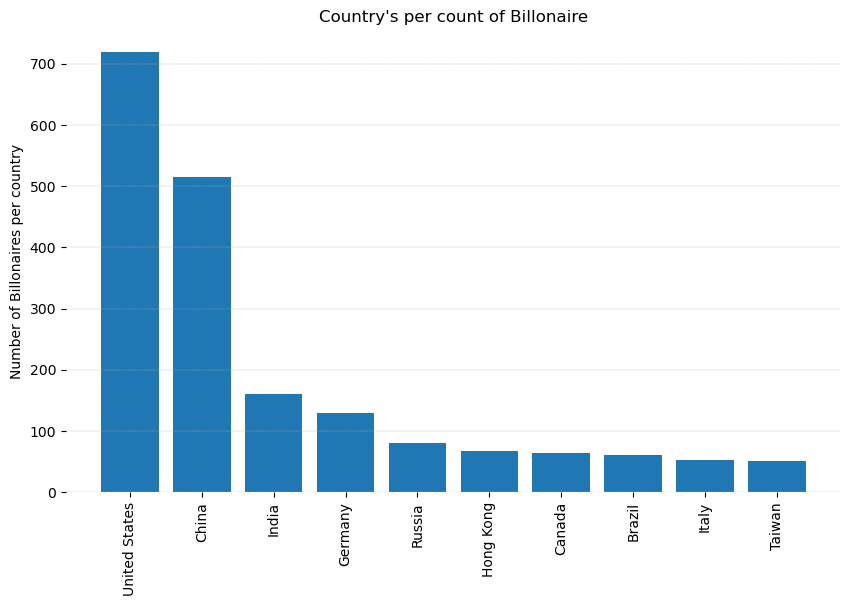

In [25]:
fig,ax2=plt.subplots(figsize=(10,6))
ax2.bar(Country_counts.index[:10],Country_counts['Count'][:10])
[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title("Country's per count of Billonaire")
ax2.set_ylabel('Number of Billonaires per country')
ax2.set_xticklabels(labels=Country_counts.index, rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

Provided the countries listed were as much as 25, I decided to split the plots in 10s because of the negligible difference in the country count width from Hong Kong downwards. Judging from the 2022 Forbes list, USA has the highest number of individuals, followed by China, India, Germany and Russia at 5th place. There appears to be a high volume of Asian countries on the list, leaving the question of how many African countries there are. This leads to my next question: "How many African countries made it to the list?

The source dataset does not have a column for Continent on its table, thereby necessitating the creation of a list of all African countries followed by a function to check which countries made the list. Let's dive in!

In [26]:
Africa=[ 'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verd','Central African Republic',
        'Chad','Comoros','Congo-Brazzaville','Congo-Kinshasa',"Côte d'Ivoire",'Djibouti','Egypt','Equatorial Guinea','Eritrea',
        'Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malaw',
        'Mali','Mauritania','Mauritius','Mayotte','Morocco','Mozambique','Namibia','Niger', 'Nigeria','Reunion','Rwanda',
        'Saint Helena','Sao Tome and Príncipe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','Sudan',
        'Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara(SADR)','Zambia','Zimbabwe']

In [31]:
Country_in_list=[]
for Country in Africa:
    if Country in Country_counts.index:
        Country_in_list.append(Country)

In [32]:
Country_in_list

['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']

There are seven African countries present in the list. 

The country with the highest billionaire count would be...

In [33]:
Country_counts.loc[['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']]

,Count
Country,
Algeria,1
Egypt,6
Morocco,2
Nigeria,3
South Africa,5
Tanzania,1
Zimbabwe,1


The above shows that Egypt has the highest number of billionaires on the list. South Africa spots the 2nd highest, followed by Nigeria and then Morroco. 
As a bonafide Nigerian, I'm keen on knowing the Nigerians that made the list, so I explore further...

In [34]:
Forbes_df['Country'][Forbes_df['Country']=='Nigeria'].index.tolist()

[129, 323, 359]

In [35]:
Nigerian_Billonaires=Forbes_df.iloc[[129,323,359]]

C:\Users\NGOZI OKEKE\AppData\Local\Temp\ipykernel_7220\2262192373.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=Nigerian_Billonaires['Name'])


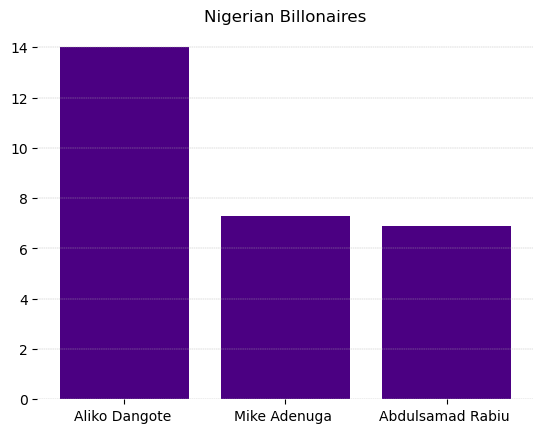

In [38]:
fig,ax3=plt.subplots()
ax3.bar(Nigerian_Billonaires['Name'],Nigerian_Billonaires['Networth($ Billion)'],color='indigo')
[s.set_visible(False) for s in ax3.spines.values()]
ax3.set_title('Nigerian Billonaires')
ax.set_ylabel('Networth $(Billions)')
ax3.set_xticklabels(labels=Nigerian_Billonaires['Name'])
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

The top 2 are an obvious occurence to Nigerians, but the 3rd individual is not well known. 
Sidebar: This means that Aliko Dangote is richer than the top 15 musicians in the USA combined🏃‍♂️

This brings me to the next question: Which industry generates the most billonaires in the world?

In [39]:
Forbes_df['Industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [40]:
Forbes_df['Industry']=Forbes_df['Industry'].apply(lambda x:x.replace(' ',''))

In [41]:
Industry_count=Forbes_df.groupby('Industry').size()

In [42]:
Industry_count=Industry_count.to_frame()
Industry_count=Industry_count.rename(columns={0:'Count'})
Industry_count=Industry_count.sort_values(by='Count',ascending=False)

In [43]:
Industry_count

,Count
Industry,
Finance&Investments,386
Technology,329
Manufacturing,322
Fashion&Retail,246
Healthcare,212
Food&Beverage,201
RealEstate,189
Diversified,178
Media&Entertainment,95


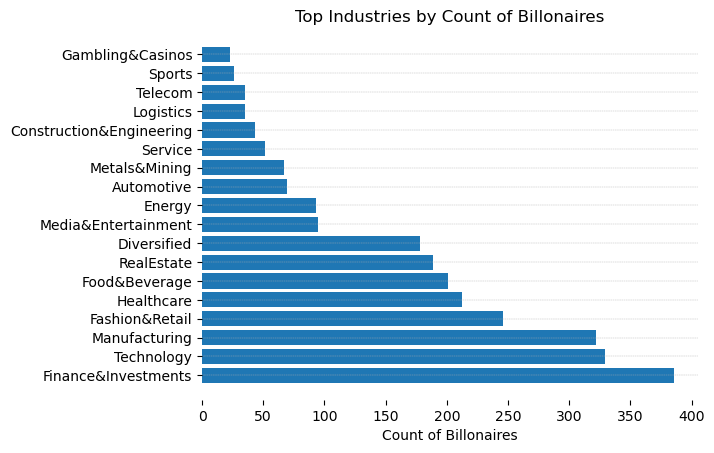

In [44]:
fig,ax4=plt.subplots()
[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(Industry_count.index,Industry_count['Count'])
ax4.set_title('Top Industries by Count of Billonaires')
ax4.set_xlabel('Count of Billonaires')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

Next, unto to checking the AGE and MONEY relationship!

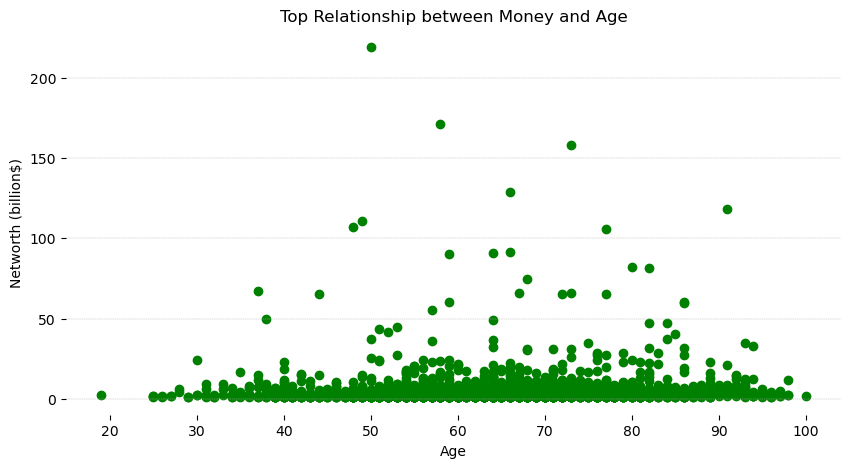

In [45]:
fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(Forbes_df['Age'],Forbes_df['Networth($ Billion)'],color='green')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Top Relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth (billion$)')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

This goes to show that there is little to no relationship between age and money...

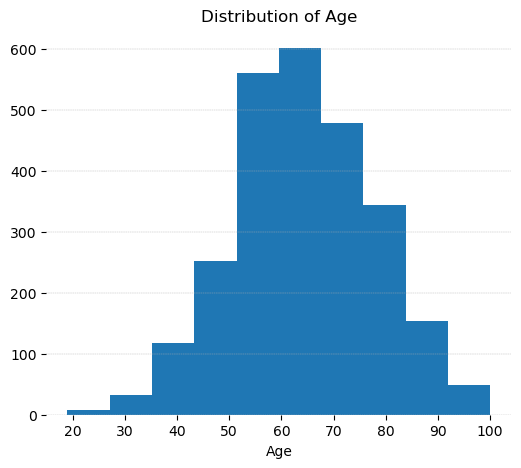

In [46]:
fig, ax6 = plt.subplots(figsize=(6,5))
ax6.hist(Forbes_df['Age'])
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Distribution of Age')
ax6.set_xlabel('Age')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [47]:
By_Age=Forbes_df.sort_values(by='Age',ascending=True)

In [48]:
By_Age

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion&Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals&Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance&Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance&Investments
...,...,...,...,...,...,...,...
1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance&Investments
1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food&Beverage
162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


A display of the oldest and youngest billionaires on the list